In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=5,
        assign_labels='discretize',
        random_state=0).fit(X)

clustering.labels_

clustering
SpectralClustering(assign_labels='discretize', n_clusters=2,
    random_state=0)

/opt/anaconda3/envs/AIML/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:453: UserWarning: Exited at iteration 2000 with accuracies 
[5.18423613e-15 4.81174223e-07 9.41725033e-07 1.03686544e-06
 1.02486755e-06 5.72994398e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1982 instead with accuracy 
1.5098515893113212e-06.

  _, diffusion_map = lobpcg(
/opt/anaconda3/envs/AIML/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:453: UserWarning: Exited postprocessing with accuracies 
[2.89506556e-15 4.75142447e-07 9.24217646e-07 1.04004667e-06
 1.05395733e-06 5.56574542e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


,n_clusters,2
,eigen_solver,None
,n_components,None
,random_state,0
,n_init,10
,gamma,1.0
,affinity,'rbf'
,n_neighbors,10
,eigen_tol,'auto'
,assign_labels,'discretize'
,degree,3


In [6]:
supervised=pd.DataFrame(dataset)

supervised['Cluster_group']=clustering.labels_

supervised


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


/opt/anaconda3/envs/AIML/lib/python3.13/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


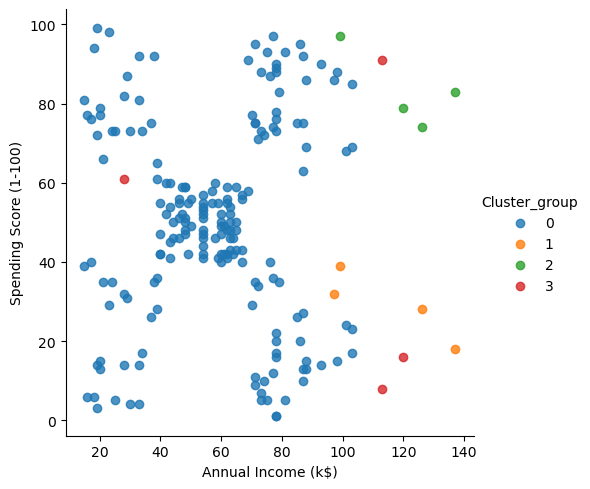

In [7]:
import seaborn as sns

facet=sns.lmplot(data=supervised , x=supervised.columns[3] ,y=supervised.columns[4] , hue=supervised.columns[5],
                 fit_reg=False , legend=True , legend_out=True)